Friday, September 8, 2023

This code is based on the samples shown at https://github.com/serengil/deepface

In [1]:
from deepface import DeepFace

2023-09-08 18:33:03.694694: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
!ls /tf/All/Data/Documents/Github/serengil/deepface/tests/dataset/img1.jpg
!ls /tf/All/Data/Documents/Github/serengil/deepface/tests/dataset/img2.jpg

couple.jpg		    img2.jpg   img31.jpg  img43.jpg  img56.jpg
face-recognition-pivot.csv  img20.jpg  img32.jpg  img44.jpg  img57.jpg
img1.jpg		    img21.jpg  img33.jpg  img45.jpg  img58.jpg
img10.jpg		    img22.jpg  img34.jpg  img46.jpg  img59.jpg
img11.jpg		    img23.jpg  img35.jpg  img47.jpg  img6.jpg
img12.jpg		    img24.jpg  img36.jpg  img48.jpg  img61.jpg
img13.jpg		    img25.jpg  img37.jpg  img49.jpg  img62.jpg
img14.jpg		    img26.jpg  img38.jpg  img5.jpg   img67.jpg
img15.jpg		    img27.jpg  img39.jpg  img50.jpg  img7.jpg
img16.jpg		    img28.jpg  img4.jpg   img51.jpg  img8.jpg
img17.jpg		    img29.jpg  img40.jpg  img53.jpg  img9.jpg
img18.jpg		    img3.jpg   img41.jpg  img54.jpg  master.csv
img19.jpg		    img30.jpg  img42.jpg  img55.jpg


In [2]:
!ls ../FaceNetPyTorch/data/lfw/images/Angelina_Jolie

Angelina_Jolie_0001.jpg  Angelina_Jolie_0008.jpg  Angelina_Jolie_0015.jpg
Angelina_Jolie_0002.jpg  Angelina_Jolie_0009.jpg  Angelina_Jolie_0016.jpg
Angelina_Jolie_0003.jpg  Angelina_Jolie_0010.jpg  Angelina_Jolie_0017.jpg
Angelina_Jolie_0004.jpg  Angelina_Jolie_0011.jpg  Angelina_Jolie_0018.jpg
Angelina_Jolie_0005.jpg  Angelina_Jolie_0012.jpg  Angelina_Jolie_0019.jpg
Angelina_Jolie_0006.jpg  Angelina_Jolie_0013.jpg  Angelina_Jolie_0020.jpg
Angelina_Jolie_0007.jpg  Angelina_Jolie_0014.jpg


In [27]:
image1 = '../FaceNetPyTorch/data/lfw/images/Angelina_Jolie/Angelina_Jolie_0001.jpg'
image2 = '../FaceNetPyTorch/data/lfw/images/Angelina_Jolie/Angelina_Jolie_0007.jpg'

image1 = '/tf/All/Data/Documents/Github/serengil/deepface/tests/dataset/img1.jpg'
image2 = '/tf/All/Data/Documents/Github/serengil/deepface/tests/dataset/img2.jpg'
image3 = '/tf/All/Data/Documents/Github/serengil/deepface/tests/dataset/img4.jpg'
image4 = '/tf/All/Data/Documents/Github/serengil/deepface/tests/dataset/img5.jpg'

result = DeepFace.verify(img1_path = image1, img2_path = image2)

In [30]:
result

{'verified': True,
 'distance': 0.2555190253609284,
 'threshold': 0.4,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 345, 'y': 211, 'w': 769, 'h': 769},
  'img2': {'x': 516, 'y': 192, 'w': 512, 'h': 512}},
 'time': 0.6}

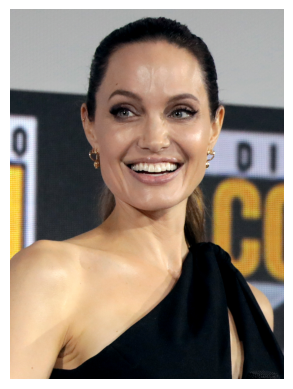

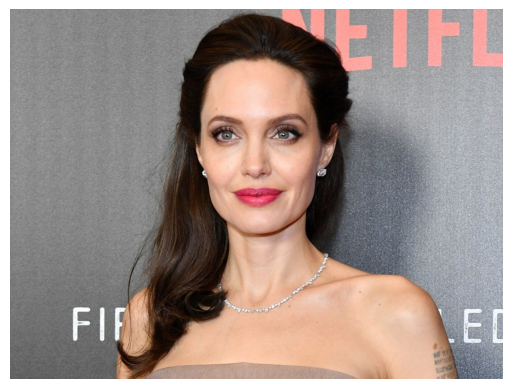

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline

# Load image from file
image_1 = Image.open(image1)

# Convert image to NumPy array
image1_array = np.array(image_1)

# Display image using Matplotlib
plt.imshow(image1_array)
plt.axis('off')
plt.show()

# Load image from file
image_2 = Image.open(image2)
image2_array = np.array(image_2)
plt.imshow(image2_array)
plt.axis('off')
plt.show()

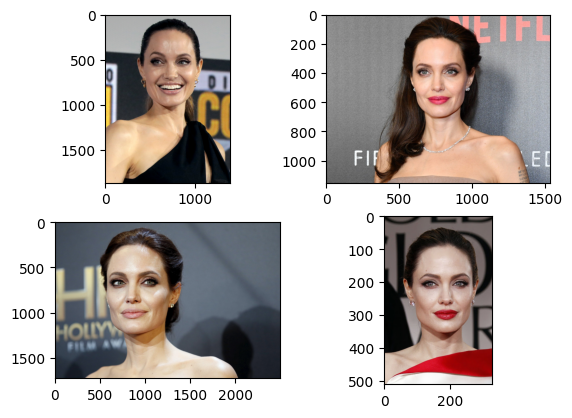

In [29]:
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(np.array(Image.open(image1)))
axarr[0,1].imshow(np.array(Image.open(image2)))
axarr[1,0].imshow(np.array(Image.open(image3)))
axarr[1,1].imshow(np.array(Image.open(image4)))

In [20]:
# from IPython.display import Image
# Image(filename=image1)
# Image(filename=image2)  

These next cells copy the code from the [face-recognition-how.py](https://github.com/serengil/deepface/blob/master/tests/face-recognition-how.py).

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from deepface import DeepFace
from deepface.commons import functions

In [11]:
# ----------------------------------------------
# build face recognition model

model_name = "VGG-Face"

model = DeepFace.build_model(model_name=model_name)

target_size = functions.find_target_size(model_name)

print(f"target_size: {target_size}")

target_size: (224, 224)


In [13]:
# ----------------------------------------------
# load images and find embeddings

img1 = DeepFace.extract_faces(img_path=image1, target_size=target_size)[0]["face"]
img1 = np.expand_dims(img1, axis=0)  # to (1, 224, 224, 3)
img1_representation = model.predict(img1)[0, :]

img2 = DeepFace.extract_faces(img_path=image3, target_size=target_size)[0]["face"]
img2 = np.expand_dims(img2, axis=0)
img2_representation = model.predict(img2)[0, :]

1/1 [==============================] - 0s 13ms/step


In [14]:
# ----------------------------------------------
# distance between two images

distance_vector = np.square(img1_representation - img2_representation)
# print(distance_vector)

distance = np.sqrt(distance_vector.sum())
print("Euclidean distance: ", distance)

Euclidean distance:  0.7381792


In [15]:
# ----------------------------------------------
# expand vectors to be shown better in graph

img1_graph = []
img2_graph = []
distance_graph = []

for i in range(0, 200):
    img1_graph.append(img1_representation)
    img2_graph.append(img2_representation)
    distance_graph.append(distance_vector)

img1_graph = np.array(img1_graph)
img2_graph = np.array(img2_graph)
distance_graph = np.array(distance_graph)

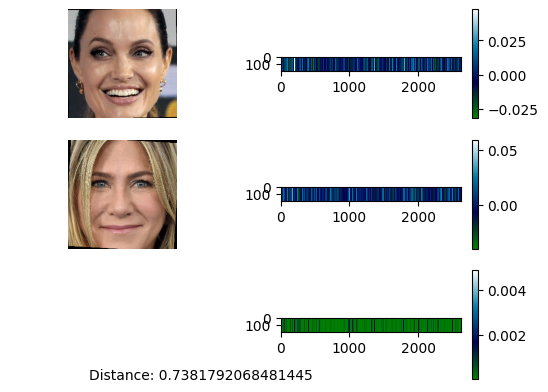

In [16]:
# ----------------------------------------------
# plotting

fig = plt.figure()

ax1 = fig.add_subplot(3, 2, 1)
plt.imshow(img1[0])
plt.axis("off")

ax2 = fig.add_subplot(3, 2, 2)
im = plt.imshow(img1_graph, interpolation="nearest", cmap=plt.cm.ocean)
plt.colorbar()

ax3 = fig.add_subplot(3, 2, 3)
plt.imshow(img2[0])
plt.axis("off")

ax4 = fig.add_subplot(3, 2, 4)
im = plt.imshow(img2_graph, interpolation="nearest", cmap=plt.cm.ocean)
plt.colorbar()

ax5 = fig.add_subplot(3, 2, 5)
plt.text(0.35, 0, f"Distance: {distance}")
plt.axis("off")

ax6 = fig.add_subplot(3, 2, 6)
im = plt.imshow(distance_graph, interpolation="nearest", cmap=plt.cm.ocean)
plt.colorbar()

plt.show()